# Palmer Penguins Dataset

**About the data**

The original data contains data for 3 penguin species, collected from 3 islands in the Palmer Archipelago, Antarctica. This Data was collected by Dr. Kristen Gorman at the Palmer Station, Antarctica. The dataset I will be using is a curated subset of the raw dataset.

**License & citation**
<br>
<br>
Data are available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data.
<br>
<br>
Please cite this data using: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

## Problem statement

In this project, I will try to predict the penguin's species from anatomical information using Python and Scikit-Learn.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ("darkgrid")

**Importing Dataset**

In [2]:
df = pd.read_csv('./Penguins.csv')

**Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
 5   Delta 15 N (o/oo)    330 non-null    float64
 6   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(1)
memory usage: 18.9+ KB


The dataset consists of 7 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)<br>
culmen_length_mm: length of the dorsal ridge of a bird's bill<br>
culmen_depth_mm: depth of the dorsal ridge of a bird's bill<br>
flipper_length_mm: length penguin flipper<br>
body_mass_g: penguin body mass<br>
Delta 15 N (o/oo): ratio of stable isotopes 15N:14N<br>
Delta 13 C (o/oo): ratio of stable isotopes 13C:12C

In [4]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,8.76651,-25.32426


In [5]:
df.isna().sum()

Species                 0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

There are certain rows with missing data, I have decided to delete the entire row with missing features.

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [7]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,44.047273,17.105455,201.312121,4215.833333,8.733382,-25.692045
std,5.446876,1.978632,13.962482,805.148981,0.551770,0.788226
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.500000,190.000000,3550.000000,8.299890,-26.323158
50%,44.900000,17.250000,197.000000,4050.000000,8.652405,-25.842775
75%,48.575000,18.600000,214.000000,4793.750000,9.172123,-25.064653
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


It is observed that the dataset contains features that are varying in degrees of magnitude, range and units. Since the importance of a feature is independent of the variance of the feature, unscaled columns may lead to wrong outcomes. I will standardize the dataset to normalize the variables.

**Standardizing the data**

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
columns_numerical = ['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']

In [11]:
X = scaler.fit_transform(df[columns_numerical])

**Data visualization**

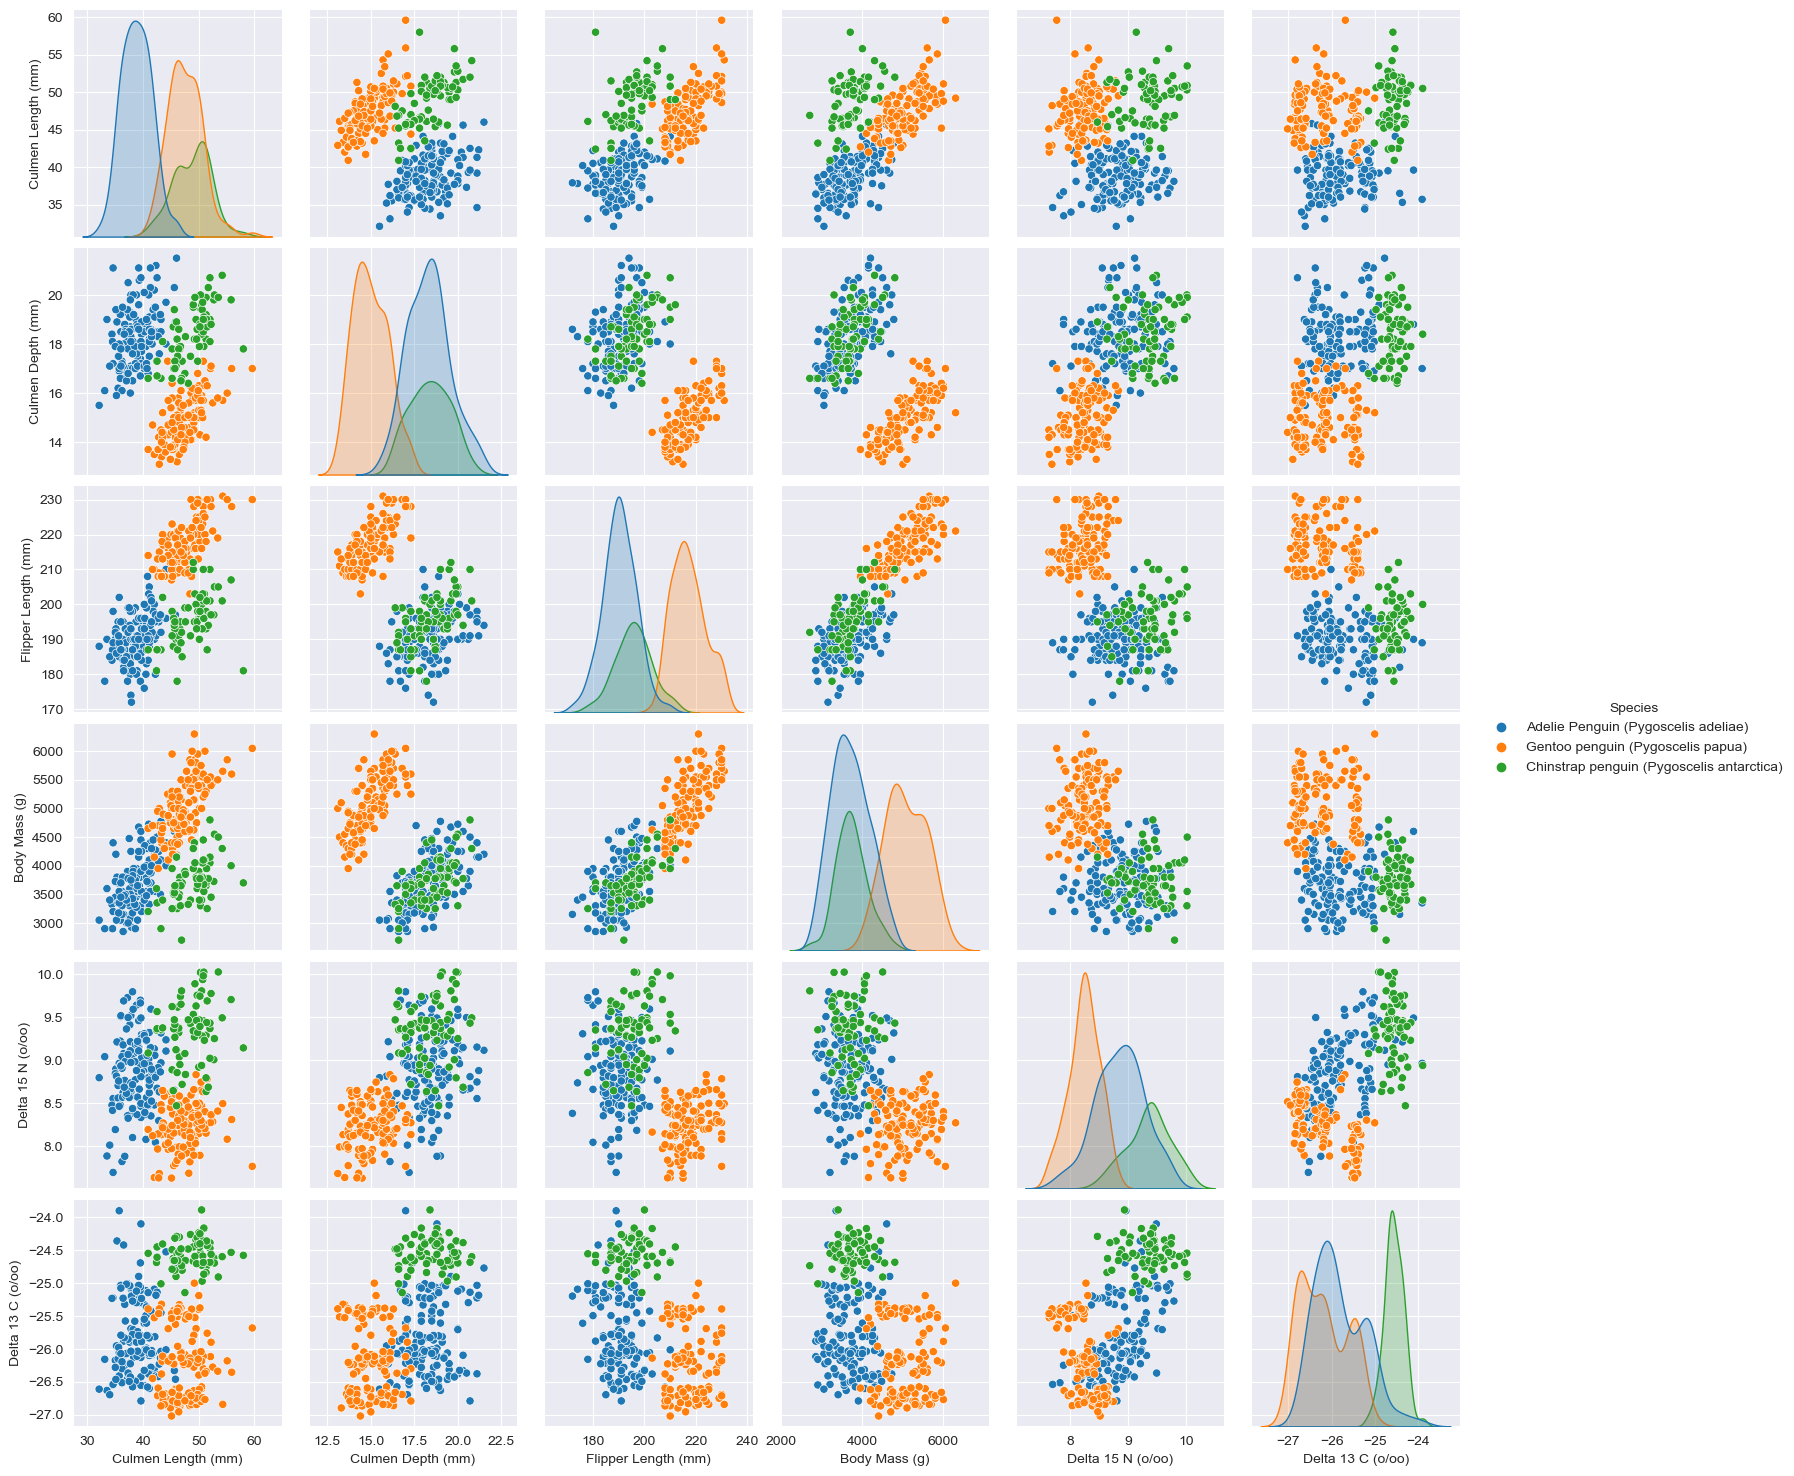

In [12]:
sns.pairplot(df,hue='Species',palette='tab10')
plt.show()

Based on the scatter-plots there is small overlap between species, but we can expect a statistical model to perform resonably well on this dataset.

**Principal Component Analysis (PCA)**

PCA is mostly used as a data preparation technique, but we can also use it to help visualize data.

Since it is difficult to visualize high dimensional data, I will use PCA to find the first three principal components, and visualize the data in this new, three-dimensional space, with a single scatter-plot.

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=3)

In [15]:
X_pca = pca.fit_transform(X)

In [16]:
pca.explained_variance_ratio_

array([0.55764457, 0.24211201, 0.09067107])

In [17]:
pca.explained_variance_ratio_.sum()

0.890427641614122

Explained variance ratio is the percentage of variance that is attributed by each of the selected components. We can see that three principal components explain the majority of the variance in this dataset (89.04%)! 

In [18]:
PCA_df = pd.concat([df[['Species']],pd.DataFrame(X_pca,columns=['principal component 1','principal component 2','principal component 3'])], axis = 1)

In [19]:
PCA_df.head()

,Species,principal component 1,principal component 2,principal component 3
0,Adelie Penguin (Pygoscelis adeliae),-1.656336,-0.029705,-0.757809
1,Adelie Penguin (Pygoscelis adeliae),-1.063747,-0.707488,-0.424201
2,Adelie Penguin (Pygoscelis adeliae),-1.773828,-0.729285,0.275627
3,Adelie Penguin (Pygoscelis adeliae),-1.828787,-0.336482,0.771250
4,Adelie Penguin (Pygoscelis adeliae),-2.025623,-0.394821,-0.321404


I will use Label Encoding to convert categorical column into numerical one for visualization

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
encoded = le.fit_transform(PCA_df['Species'])

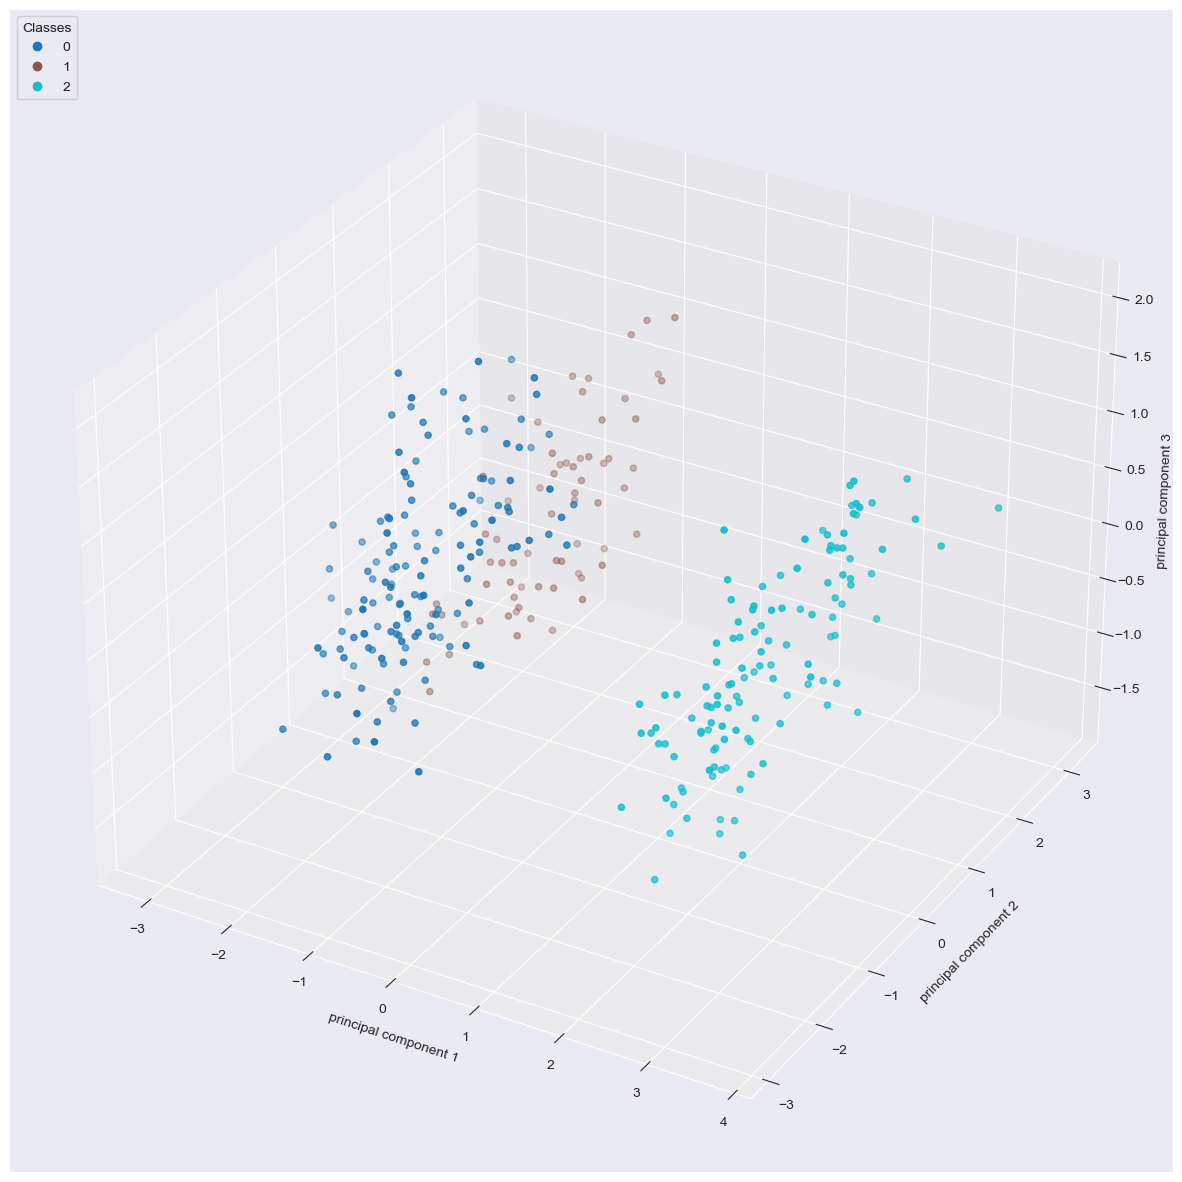

In [22]:
fig = plt.figure(figsize=(15,30))
ax = fig.add_subplot(111,projection='3d')
scatter = ax.scatter(PCA_df['principal component 1'], PCA_df['principal component 2'], PCA_df['principal component 3'],c=encoded,cmap='tab10')
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
plt.show()

Based on the visualization, it looks like SVM algorithm will be able to find the best hyperplane that separates the classes.

## Support Vector Machines

SVM terminology. 

**Hyperplane**

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


**Support Vectors**

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.


**Margin**

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.


**Split data into separate training and test set**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.30, random_state=101)

**Building a Support Vector Machine on train data**

In [25]:
from sklearn.svm import SVC

In [26]:
model = SVC()

In [27]:
model.fit(X_train,y_train)

SVC()

In [28]:
predictions = model.predict(X_test)

**Model Evaluation**

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

**Confusion matrix**
A confusion matrix is a tool for summarizing the performance of a classification algorithm.

In [30]:
print(confusion_matrix(y_test,predictions))

[[42  0  0]
 [ 0 19  0]
 [ 0  0 38]]


**Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        38

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



The model worked pretty well